In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import solution

# Python for Data Science

![correlation](img/xkcd_correlation.png "correlation")

**Outline:**
* Data understanding
    * Analytical
    * Visual
* Data cleaning / preprocessing
* Modeling approaches
    * Growing
    * Pruning
    * Automation (Machine Learning)
* Evaluating Model performance
* Common pitfalls


**The solutions are below the exercises, so don't skip ahead!**

## Data Understanding

### Understanding the background

A solid understanding of the data is the foundation for every analysis. One should investigate the process of how the data came to be and what the correct interpretation of the recorded variables is.

Questions to ask:
- How, when, where, and why was this data recorded?
- What process in the real world does this data reflect?
- Who collected the data and with what goal?
    * Was the data gathered by accident?
    * Was it gathered to investigate or proof something?
- Is there some (business) relationship between the variables that we assume a priori? 
    * We know that we would have ~0 sales if our cappuccino cost 1000 EUR/cup
    * We know that a tax rate of 100% means tax revenue of 0.
    * We know that a projectile's accuracy decreases with distance traveled. 
    * WARNING: We **knew** for a long time, that interest rates have to positive...
    * WARNING: Machines come **without** all these a priori assumptions!
- Is the data complete?
    * Which observations might be missing?
    * Are observations missing at random or by some pattern?
    * Which variables could have been measured but weren't - and why weren't they measured?
    * How could the data be augmented from other sources?
- Is the data current?
    * Current pertaining to what real world phenomenon?
    * Are parts of the data current?
    * What changed since the recording?
    * Did the measurement / recording process change during the recording? 
    * How long will the data stay current?
- Was the data aggregated / what resolution does it have?
    * Tick prices VS averages for each second 
    * Rough VS smoothed sensor data
    * Family income VS individual income VS GDP

### Excursion: Python & R

R is a statistical programming language with witch one can do a lot of the same things as with python, pandas and scikit-learn. The languages have different strengths and weaknesses but both are excellent and both can get the job done. In this case, we want to import a built-in data set from R into python. For this we briefly explore rpy2, the API between pandas and R.  
  
If you have R installed and set the environment variables (Path), you can install rpy2 via pip and uncomment the below code to see, how easy it is to connect R with python.

In [ ]:
#from rpy2.robjects import r, pandas2ri # Think of r as a hidden r session controlled from python
#pandas2ri.activate() # This activated automatic type conversion between r and pandas for many types (including data frames)
#r('x = 1+1') # We can run r code in our r session by using it like a function!
#print(r['x'])# We can also use the r session like a dictionary and extract data.

In [ ]:
#mtcars = r['mtcars'] # For this Tutorial, we just want the 'mtcars' data set from R!

In case you do not have R installed or you have problems with the above code, simply load the data from the csv:

In [2]:
mtcars = pd.read_csv('data/mtcars.csv')

#### Motor Trend Car Road Tests 
(From the help text in r: `?mtcars`)

##### Description

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

##### Format

A data frame with 32 observations on 11 variables.

|col#|name|description|
|----|----|-----------|
| [, 1]|	 mpg|	 Miles/(US) gallon|
| [, 2]|	 cyl|	 Number of cylinders|
| [, 3]|	 disp|	 Displacement (cu.in.)|
|[, 4]|	 hp	| Gross horsepower|
|[, 5]|	 drat|	 Rear axle ratio|
|[, 6]|	 wt|	 Weight (1000 lbs)|
|[, 7]|	 qsec|	 1/4 mile time|
|[, 8]|	 vs	| V/S|
|[, 9]|	 am	| Transmission (0 = automatic, 1 = manual)|
|[,10]|	 gear|	 Number of forward gears|
|[,11]|	 carb|	 Number of carburetors|

##### Source

Henderson and Velleman (1981), _Building multiple regression models interactively_ Biometrics, 37, 391–411.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True


In [10]:
mtcars.loc[:,mtcars.dtypes == 'float64']

,mpg,disp,drat,wt,qsec
0,21.0,160.0,3.90,2.620,16.46
1,21.0,160.0,3.90,2.875,17.02
2,22.8,108.0,3.85,2.320,18.61
3,21.4,258.0,3.08,3.215,19.44
4,18.7,360.0,3.15,3.440,17.02
5,18.1,225.0,2.76,3.460,20.22
6,14.3,360.0,3.21,3.570,15.84
7,24.4,146.7,3.69,3.190,20.00
8,22.8,140.8,3.92,3.150,22.90
9,19.2,167.6,3.92,3.440,18.30


### Analytical Inspection
Lets see which columns we have! This is most helpful for large data frames, where we can not just look at the whole spreadsheet at once!

In [11]:
mtcars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

Glimpse at the data! For large data sets, look at a random sample of rows!

In [12]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Now we will take a look at the data types and memory useage. Questions to ask:
* Are the types right? 
    * In this case: Should we really only use floats?
    * Typical example: Region codes should not be float!
* Is the data too big?
    * If it is: Optimize memory useage or 
    * Use spark
        
For more information, we provide separate tutorials "optimizing memory use in Python" and "introduction to Spark".

In [13]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


Let's get a first impression of the size and distribution of our variables: 

In [14]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Look for missing / extreme values (and omit or treat them later):

In [15]:
print(mtcars.isnull().any().any()) # We don't have missing values so we are done. 
print(np.isinf(mtcars).any().any()) # In case of missing data, remove the last "any()" to get column wise info!

False
False


### Visual Inspection 
A crucial step in getting to grips with the data is visual inspection.
When computers first became available for statistical work, some users began to doubt the importance of old fashioned charts in light of numerical summary statistics. The attitude was: 

_Numerical calculations are exact, but graphs are rough._

Anscombe countered that view with a famous paper in which he showed 4 plots with the exact same regression line through 4 different data sets. Each plot produced the exact same:
 - Means
 - Sample variances
 - Correlation between x and y
 - Coefficient of determination (R^2)

One should take Anscombe's advice to heart: 

> _Graphs are essential to good statistical analysis._

> F. J. Anscombe, The American Statistician, Vol. 27, No. 1. (Feb., 1973), pp. 17-21
http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf

C:\Users\EricVogel\Anaconda3\envs\advipy\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


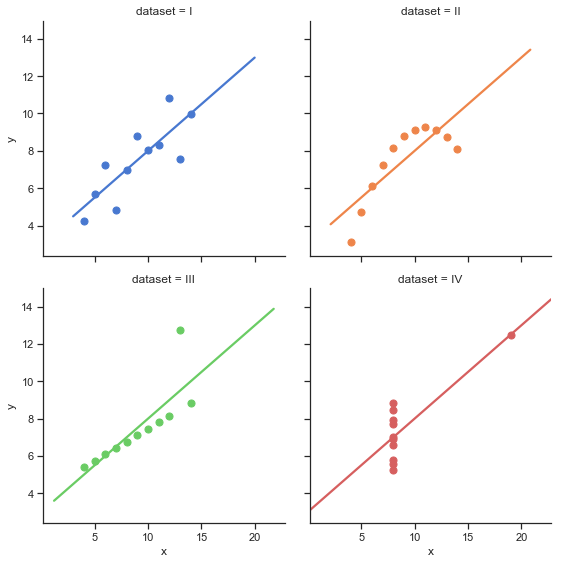

In [16]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

Let's visually inspect our data set!
A good starting point is a series of box plots. Box plots (sometimes called box-whiskers-plots) can convey most of the information a histogram contains, but occupying much less space. This makes it possible to quickly compare the distribution of all of our variables at a glance: 
- The green line shows the variables' mean.
- The inner box represents 50% of all values.
- The outer "whisker" signify the range of the distribution.
- If variables contain outliers, they are marked by individual points. 

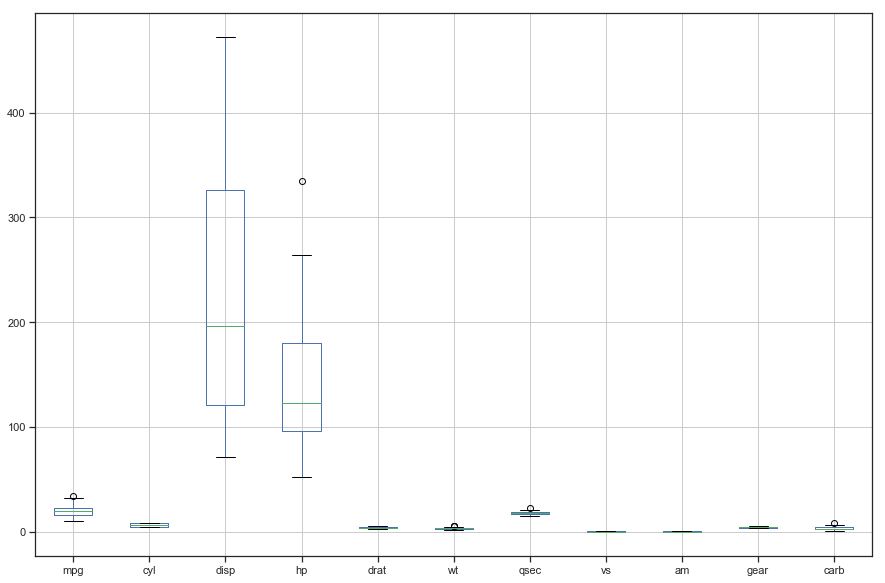

In [19]:
mtcars.boxplot(figsize=(15, 10))

In [26]:
m

C:\Users\EricVogel\Anaconda3\envs\advipy\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  """Entry point for launching an IPython kernel.


ValueError: invalid literal for int() with base 10: 'disp'

**Exercise:**: The scale seems unsuitable for some of the variables. Can you make two separate box plots to better show the scale of all variables? Would you classify any points as "outliers"?

We now want to know how the individual variables vary together as pairs. For this we use `scatter_matrix`. The resulting matrix is symmetrical, since each cell shows the interaction between the column and the row variable. In our case the trace of the matrix is used to display a kernel density estimation (kde) of each single variable.  

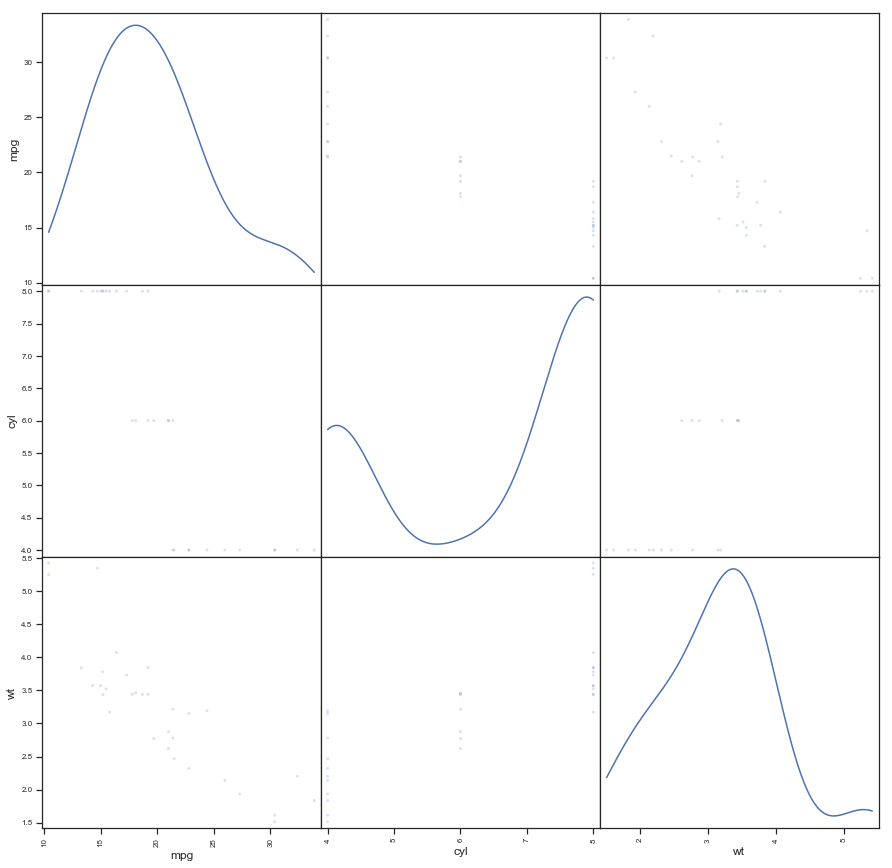

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(mtcars[['mpg', 'cyl', 'wt']], alpha=0.2, figsize=(15, 15), diagonal='kde')
a=0

**Exercise:** The cells of the matrix are a bit small. Can you make a similar matrix for a subset of the variables? Which variables might be interesting to compare? Which variables may show a relationship?

Scatter plots are often a good way to visualize multidimensional data, since we can use point thickness, point shape, color and the two axis to display dimensions of our data. Though, a plot using all of these will most likely be too crowded!  

A simple example first! Let's see, if wt and mpg show any pattern:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


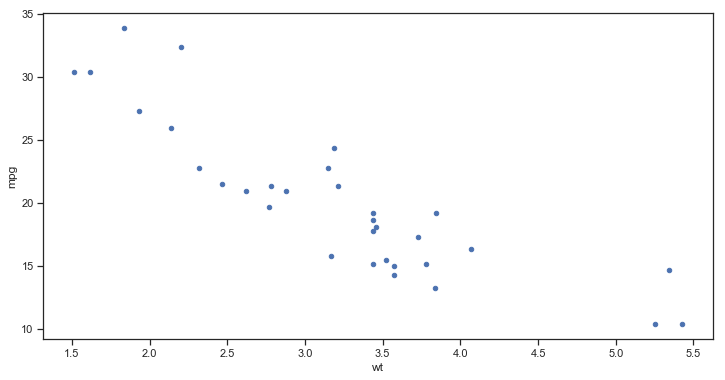

In [28]:
mtcars.plot.scatter(x='wt', y='mpg', figsize=(12, 6))

We can scale the dots by hp to see were the powerful cars fall in this picture (big dot equals big engine): 

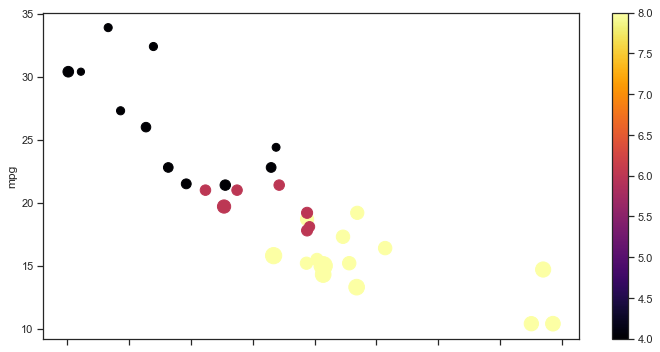

In [37]:
mtcars.plot.scatter(x='wt', y='mpg', s=mtcars['hp'], c=mtcars["cyl"],cmap="inferno", figsize=(12, 6));

Layered color groups are good for identifying clusters.

We can check if we can separate the manual transmissions from the automatic ones by using only hp and mgp: 

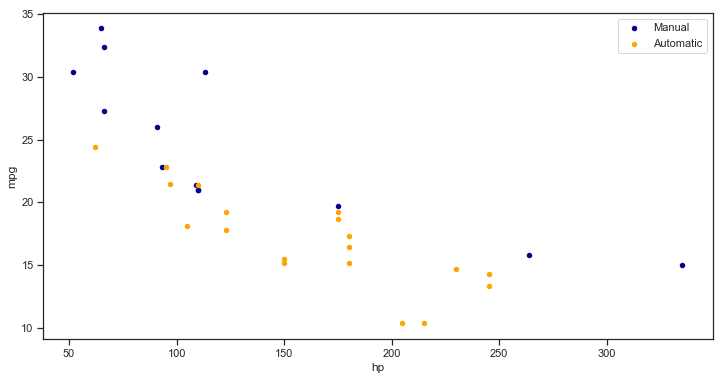

In [38]:
ax = mtcars[mtcars["am"] == 1].plot.scatter(x='hp', y='mpg', color='DarkBlue', label='Manual', figsize=(12, 6));
mtcars[mtcars["am"] == 0].plot.scatter(x='hp', y='mpg', color='Orange', label='Automatic', ax=ax);

A similar exercise for number of cylinders:

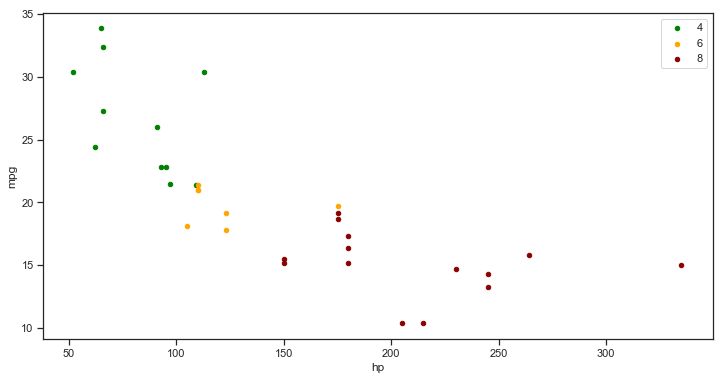

In [39]:
ax = mtcars[mtcars["cyl"] == 4].plot.scatter(x='hp', y='mpg', color='Green', label='4', figsize=(12, 6));
mtcars[mtcars["cyl"] == 6].plot.scatter(x='hp', y='mpg', color='Orange', label='6', ax= ax);
mtcars[mtcars["cyl"] == 8].plot.scatter(x='hp', y='mpg', color='DarkRed', label='8', ax= ax);

The seaborn package allows for even more visualization. Fitting a regression line + confidence interval trough data is often useful.

We can check, if weight is a good estimator for horsepower: 

C:\Users\EricVogel\Anaconda3\envs\advipy\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


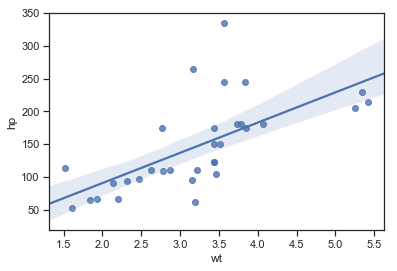

In [40]:
import seaborn as sns # https://seaborn.pydata.org/index.html
sns.regplot(mtcars['wt'], mtcars['hp']) 

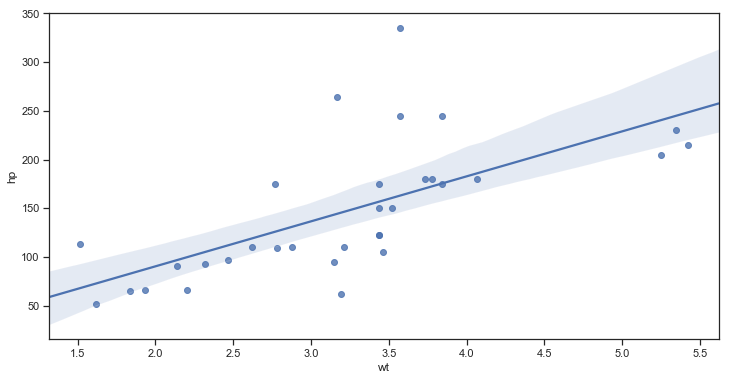

In [41]:
import matplotlib.pyplot as plt # Now I need matplotlib for adjusting size!

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.regplot(mtcars['wt'], mtcars['hp'], ax=ax)

Bar plots are useful to finding patterns for categorical variables!

Let's see, if cars with automatic VS manual transmission differ:

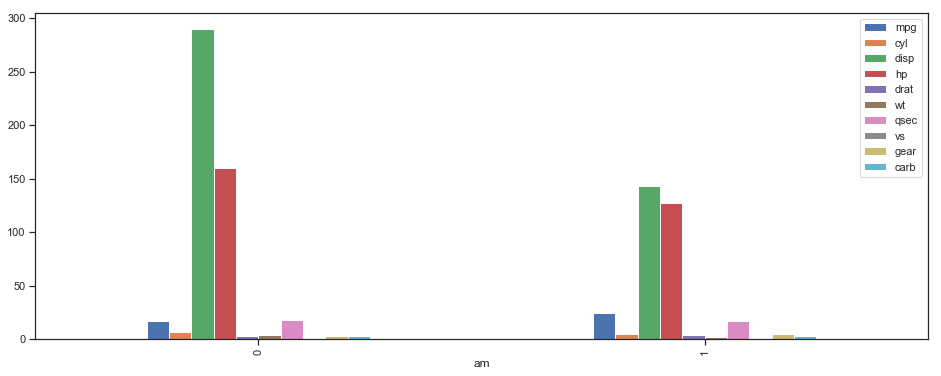

In [42]:
mtcars.groupby("am").mean().plot.bar(figsize=(16,6))

More recipes for data visualization can be found here:
https://pandas.pydata.org/pandas-docs/stable/visualization.html

A classic work on the topic is _The Visual Display of Quantitative Information_ by Edward Tuft:
https://www.edwardtufte.com/tufte/books_vdqi

## Data cleaning / preprocessing

### Cleaning
* Treating / omitting missing values & extreme values & outliers
    * There are no hard an fast rules for outliers
    * Visual inspection is your best bet for outliers
    * When in doubt about what do include / exclude: Do both versions and compare the results!
* Data Quality
    * Correct time zones
    * Encoding (Umlauts!)
    * Gaps
* Sanity checks
    * Is age only positive?
    * Do area codes exist?

### Preprocessing
* Enriching with other data
    * Geo locations
    * Weather
    * Calendar effects
* Encoding
    * one hot -> one boolean column per category for categorical data
    * dummies -> Example: 0 or 1 signifying a holiday in a time series (Avoid dummy variable trap!)
* Scaling
    * Percentage changes instead of nominal changes (makes different levels comparable, but loses level information) 
    * Range between one and zero (avoids large numbers)
    * Inflation adjustment
* Building New variables
    * Combinations: Calculate ROI as new variable from Return and invested capital
    * Beware of multicollinearity!

**Note:** In theory, steps like:
- treating missing values / outliers
- creating new variables 
- scaling variables 
...belong in the preprocessing step! 

In practice, we may need to do some preprocessing to do the inspection we want! 

It is crucially important to **do all the data wrangling in the code - and keep this code!** If we for example manipulate data by hand in the .csv file, we lose reproducibility!

In [43]:
# Get the original set back in case you changed something
#mtcars = r['mtcars']  # if you loaded R in the beginning
mtcars = pd.read_csv('data/mtcars.csv')  # otherwise

mtcars["vs"] = mtcars["vs"] == 1
mtcars["am"] = mtcars["am"] == 1
mtcars["cyl"] = mtcars["cyl"].astype(np.uint8)
mtcars["gear"] = mtcars["gear"].astype(np.uint8)
mtcars["carb"] = mtcars["carb"].astype(np.uint8)

In [44]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null uint8
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null bool
am      32 non-null bool
gear    32 non-null uint8
carb    32 non-null uint8
dtypes: bool(2), float64(5), int64(1), uint8(3)
memory usage: 1.8 KB


### Modeling

**Models are artifacts which transform structured data into i.i.d. noise!**

i.i.d. = independent, identically distributed

At this stage, you should know what you are looking for / what purpose your model should serve. 
The pure "Data Mining" approach of searching for any trend or structure in your data is fraught with peril. Even in random data, you will find structures by pure chance! This is still a problem if you know what you are looking for, but it can become a fatal problem if you don't!

Remember:

**All models wrong, some are useful!**

All models are wrong because a 100% correct model is useless, much like a map of the scale 1:1 would be useless! 

#### Strategies in Modeling
* Growing: Start with a minimal model and grow it stepwise by adding new features!
* Pruning: Start with a big model (with too many features) and successively cut back the ones with least predictive power. 
* Automation / Machine Learning: Automate the process of growing and pruning.
    * Driven my some metric (MAPE, R^2) that is optimized
    * Can include meta parameters: Everything that is not a direct feature in the data (like type of optimizer to use)



#### Feature selection: Fundamental approach

The best way to select features is a hypothesis based on a priori information.
For example: If I already expect (from my knowledge of engineering) that number of cylinders influences max speed, I should include it in a model were I want to predict max speed!

#### Feature selection: Linear relationship

The first guess or data can give us about features, is to look for linear relationships between our variables! This only works well for metric variables.

In [45]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null uint8
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null bool
am      32 non-null bool
gear    32 non-null uint8
carb    32 non-null uint8
dtypes: bool(2), float64(5), int64(1), uint8(3)
memory usage: 1.8 KB


In [46]:
float_cols = ["mpg", "disp","hp","drat","wt","qsec"]
cov_mat = np.cov(mtcars[float_cols].values.T)
triu_cov_mat = np.triu(cov_mat)
pd.DataFrame(triu_cov_mat, columns=float_cols, index=float_cols)

,mpg,disp,hp,drat,wt,qsec
mpg,36.324103,-633.097208,-320.732056,2.195064,-5.116685,4.509149
disp,0.000000,15360.799829,6721.158669,-47.064019,107.684204,-96.051681
hp,0.000000,0.000000,4700.866935,-16.451109,44.192661,-86.770081
drat,0.000000,0.000000,0.000000,0.285881,-0.372721,0.087141
wt,0.000000,0.000000,0.000000,0.000000,0.957379,-0.305482
qsec,0.000000,0.000000,0.000000,0.000000,0.000000,3.193166


**Exercise:** What could be a potential problem with picking model features based on strong covariance with the target variable?

In [47]:
float_cols = ["mpg", "disp","hp","drat","wt","qsec"]
corrcoef_mat = np.corrcoef(mtcars[float_cols].values.T)
triu_corrcoef_mat = np.triu(corrcoef_mat)
pd.DataFrame(triu_corrcoef_mat, columns=float_cols, index=float_cols)

,mpg,disp,hp,drat,wt,qsec
mpg,1.0,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,0.0,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,0.0,0.000000,1.000000,-0.448759,0.658748,-0.708223
drat,0.0,0.000000,0.000000,1.000000,-0.712441,0.091205
wt,0.0,0.000000,0.000000,0.000000,1.000000,-0.174716
qsec,0.0,0.000000,0.000000,0.000000,0.000000,1.000000


It has become a truism to say "correlation does not imply causation".
But while correlation may *not in every case* imply causation, it sure is a good indicator for causation!

![correlation](img/xkcd_correlation.png "correlation")

Lets start with building a minimal model for explaining qsec!
We know that we need lots of power to drive a fast quarter mile, also the two seem highly correlated in the matrix above. So we make our minimal model:

In [63]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mtcars[["qsec","wt","disp"]], 
                                                           mtcars["hp"], test_size=0.33, random_state=42)
                                                           
reg = linear_model.LinearRegression(fit_intercept=True, n_jobs=1, normalize=False)
reg.fit (X_train, y_train)
print(reg.coef_)
pred = reg.predict(X_test)

[-18.7685313    9.41549811   0.27249848]


We can compare our predictions to the actual values:

In [64]:
comparison = pd.DataFrame({"real":y_test.values, 
                           "pred":np.round(pred, 2), 
                           "error":np.round(y_test.values-pred, 2)}, 
                          index=y_test.index)[["real", "pred", "error"]]
print(comparison)

    real    pred   error
29   175  159.73   15.27
15   215  227.01  -12.01
24   175  210.25  -35.25
17    66   61.78    4.22
8     95   23.27   71.73
9    123  119.64    3.36
30   335  226.66  108.34
25    66   70.07   -4.07
12   180  165.00   15.00
0    110  144.39  -34.39
4    175  196.10  -21.10


Let's see how well our model performs by looking at some metrics:

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_test, pred):
    return np.mean(np.abs((y_test - pred) / y_test))*100

# The Intercept (when fit_intercept=True )
print('Intercept: {:.4f}'.format(reg.intercept_))
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, pred)))
# The mean absolute error
print("Mean absolute error: {:.2f}".format(mean_absolute_error(y_test, pred)))
# The mean absolute percentage error (May cause division by zero!)
print("Mean absolute percentage error: {:.2f}".format(mean_absolute_percentage_error(y_test, pred)))
# R^2: 1 means 100% percent explained variance
print('R^2: {:.2f}'.format(r2_score(y_test, pred)))

Intercept: 385.0467
Coefficients: 
 [-18.7685313    9.41549811   0.27249848]
Mean squared error: 1854.51
Mean absolute error: 29.52
Mean absolute percentage error: 19.02
R^2: 0.66


**Exercise:** Can you improve the model above by growing it?

In [ ]:
diamonds = pd.read_csv("data/diamonds.csv")

**Diamonds**

A data frame with 53940 rows and 10 variables:

http://ggplot2.tidyverse.org/reference/diamonds.html

- **price** price in US dollars (\\$326--\\$18,823)

- **carat** weight of the diamond (0.2--5.01)

- **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- **color** diamond color, from J (worst) to D (best)

- **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- **x** length in mm (0--10.74)

- **y** width in mm (0--58.9)

- **z** depth in mm (0--31.8)

- **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- **table** width of top of diamond relative to widest point (43--95)

In [ ]:
diamonds.head(5)

#### Feature selection: One hot encoding
Drop the last dummy, don't fall into the dummy trap! 

In [ ]:
diam_dummies = pd.get_dummies(diamonds[["cut", "color", "clarity"]], columns =["cut", "color", "clarity"], drop_first=True)
diam_dummies.head()

In [ ]:
diamonds = diamonds.copy()
diamonds["cut_num"] = diamonds["cut"]
diamonds.loc[diamonds["cut"] == "Ideal", "cut_num"] = 5
diamonds.loc[diamonds["cut"] == "Premium", "cut_num"] = 4
diamonds.loc[diamonds["cut"] == "Very Good", "cut_num"] = 3
diamonds.loc[diamonds["cut"] == "Good", "cut_num"] = 2
diamonds.loc[diamonds["cut"] == "Fair", "cut_num"] = 1
diamonds.head()

This time we have a classification problem: We want to estimate the cut of the diamonds. We begin again with the minimal model:

In [ ]:
reg = linear_model.LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(diamonds[["price"]], 
                                                    diamonds["cut_num"], 
                                                    test_size=0.20, 
                                                    random_state=42)
reg.fit(X_train, y_train) 
pred = reg.predict(X_test)

This time we asses model performance by precision / recall:

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred, target_names=["Fair", "Good", "Very Good", "Premium", "Ideal"])
print(report)

Recall: How many of a class have been correctly identified?
Precision: How many classifications have been correct 
![Recall_Precision](img/Precisionrecall.png)

https://en.wikipedia.org/wiki/Precision_and_recall#/media/File:Precisionrecall.svg)

In [ ]:
comparison = pd.DataFrame({"real":y_test.values, 
                           "pred":np.round(pred, 2), 
                           "match":y_test.values==pred}, 
                          index=y_test.index)[["real", "pred", "match"]]
print(comparison)

**Exercise:** can you improve the classification model above?

#### Feature selection: Non linear relationships / Interaction terms

Sometimes a correlation does not tell the whole story. A variable may have a nonlinear relationship with another variable, or may be dependent on a categorical variable.

A decision tree can in itself be a good model. It is not good for precisely estimating metric variables (because it partitions the data in discrete nodes) but it is excellent at capturing interaction terms ("if the person is > 50 AND smokes the cancer risk rises drastically") and can deal with non linear relationships.

In [ ]:
mtcars_data = mtcars.drop('cyl', axis=1)
mtcars_target = mtcars.loc[:, "cyl"]

In [ ]:
from sklearn import tree 
from sklearn.datasets import load_iris
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(mtcars_data, mtcars_target)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(mtcars_data.columns),  
                         class_names=[str(c) for c in clf.classes_], # Convert  class names from  model to string!
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

* The first line in every box show the criteria by which the split is made. It is missing in the last level of nodes, since no more split is made there.
* The second is the gini coefficient, which is a measure for how pure the classification is in that node. It should one decrease with succeeding nodes and zero dignifies a pure node with only one class in it.
* Samples is the number of observations in this node. If this number becomes to small, the tree will probably over fit!
* Value shows how many observations of each class are in that node. Hence, the vector has as many entries as we have classes and it should sum up to the number of samples in that node.
* class is our best guess for the class of all samples in that node.

##### Most important meta parameters for tree modeling:

* max_depth
* min_samples_split
* min_samples_leaf 
* max_leaf_nodes 

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**Exercise:** Can you improve our linear regression model above by including interaction terms?

#### Feature selection: Dimension reduction & multicollinearity 

Ideally, the features we use for prediction should be independent from each other. This is frequently not the case. Age, height and weight may both help to predict likelihood for some condition, but they also influence each other. This is called "multicollinearity ".

Also, we want to use as few variables as possible to make our models robust and ward against overfitting. Wouldn't it be nice, if we could get rid of multicollinearity  and have fewer variables at the same time?

Fortunately we can, and we will learn how by looking at cat pictures! 

In [ ]:
import urllib.request
urllib.request.urlretrieve("https://s7d2.scene7.com/is/image/PetSmart/PB1801_FEAT_PROD-CatTile-20170130?$CL0404$", "cat_small.jpg")

In [ ]:
import imageio
cat = imageio.imread('img/cat_small.jpg')

In [ ]:
from skimage import data, io, filters
io.imshow(cat)

In [ ]:
from skimage import data, io, filters
cat_channel0 = cat[:,:,0]
io.imshow(cat_channel0)

We picked the first channel of the colored cat picture. The library sklearn interprets the picture as a matrix with as many observations as there are rows and as many features as there are columns. The image is currently 320x320 pixel, so it has 320 features. We will try to condense the image to fever features using principle component analysis (PCA)!

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5) # change this number for better cat picture!
pca.fit(cat_channel0)
cat_transform = pca.transform(cat_channel0)
cat_inverse_transform = pca.inverse_transform(cat_transform)
io.imshow(cat_inverse_transform)

PCA and singular value decomposition are closely related. 

To simplify: Using a PCA, we transform a matrix of linearly dependent columns into a new matrix of linearly independent columns. A nice effect is: The columns of the resulting matrix contain all the information of the original matrix in descending order. That is, column 1 stores most of the information of the original, column 2 stores a little less and so on. That means we can use fewer columns of our new matrix and still capture most of the information in the original matrix. With each column (feature) we add, we capture more of the original, but we have diminishing returns with each new column.

From a practical standpoint, we extract all the information from those features that suffer from multicollinearity and stuff as much of it as possible into a smaller set of independent variables. 

You can find a more rigorous explanation and a full tutorial here: https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf


**TL;DR**: PCA transforms many dependent features into fever independent features!

In the example above, we can already get a recognizable cat by using way less than the original 320 features!
A significant drawback of methods like this is, that the resulting features can no longer be interpreted!

**Exercise:** How many features from the PCA do you need, to make a good enough cat picture?

**Exercise:** Can you improve our regression model by using PCA components?

## Applications / Real World Problems


### Analyzing US Storm Data

Data about storms and other weather events can be found here:
https://www.ncdc.noaa.gov/stormevents/ftp.jsp

In [ ]:
path = os.path.join('data','Storm')
all_files = glob.glob(os.path.join(path, "StormEvents_details*.csv"))
print(all_files)

In [ ]:
storms_raw = pd.concat((pd.read_csv(f) for f in all_files))

In [ ]:
storms_raw.head(5)

In [ ]:
storms_raw.describe()

In [ ]:
storms_raw.info()

In [ ]:
storms_raw.columns

In [ ]:
storms = storms_raw[['BEGIN_YEARMONTH', 
             'BEGIN_DAY', 
             'EVENT_TYPE', 
             'INJURIES_DIRECT',
             'INJURIES_INDIRECT',
             'DEATHS_DIRECT',
             'DEATHS_INDIRECT',
             'MAGNITUDE',
             'MAGNITUDE_TYPE',
             'MONTH_NAME',
             'STATE']]

In [ ]:
storms.head(3)

In [ ]:
storms.info()

In [ ]:
storms.loc[:, "DATE"] = storms.loc[:, ["BEGIN_YEARMONTH", "BEGIN_DAY"]].apply(
                                                lambda x : pd.datetime(
                                                     year=int(str(x["BEGIN_YEARMONTH"])[0:4]),
                                                     month=int(str(x["BEGIN_YEARMONTH"])[4:6]),
                                                     day=x["BEGIN_DAY"]),
                                                     axis=1)

In [ ]:
storms.loc[:, "YEAR"]= storms['DATE'].dt.year
storms.loc[:, "INJURIES"] = storms['INJURIES_DIRECT'] + storms['INJURIES_INDIRECT']
storms.loc[:, "DEATHS"] = storms['DEATHS_DIRECT'] + storms['DEATHS_INDIRECT']

**Exercise**: Which US states had the least adverse weather events for each year looking at the last 10 years?

In [ ]:
# %load solution.min_by_year_a

In [ ]:
# %load solution.min_by_year_b

**Exercise:** Did _HAWAII WATERS_ really have the fewest weather events for most of the last 10 years?  

In [ ]:
# %load solution.hawaii_a

In [ ]:
# %load solution.hawaii_b

In [ ]:
# %load solution.hawaii_c

#### Common pitfalls: Not counting from zero!

The example with the storm data above illustrates a tricky problem: If we aggregate data from individual observations to counts of data, we will not get an aggregation for the "zero" category! 

### Analyzing Gender Discrimination in Berkeley University (1973)

In [ ]:
students = pd.read_csv("data/student_data_1973.csv")
students.head()

**Exercise:** Students claimed, that the university in question discriminated against women when accepting new students. On the basis of the data, do you support or reject that claim?

In [ ]:
# %load solution.students_a

In [ ]:
# %load solution.students_b

In [ ]:
# %load solution.students_c

In [ ]:
# %load solution.students_d

In [ ]:
# %load solution.students_e

#### Common pitfalls: Simpson's Paradox

The example above is a famous case, where a general trend over all categories breaks down for each individual category. It is a sub-case of a confounding variable (see the section on that topic below). In this case the confounding variable is the different interest for different subjects in male and female students.

Sources:
* http://homepage.stat.uiowa.edu/~mbognar/1030/Bickel-Berkeley.pdf
* https://en.wikipedia.org/wiki/Simpson%27s_paradox

We can find the same effect in our mtcars data!
Overall, we have a positive correlation between a cars weight and its horsepower. But surely, making a car heavier does not make it faster?

In [ ]:
sns.regplot(mtcars['hp'], mtcars['wt']) 

And, when we control for number of cylinders (which is a proxy for engine size), we see that the correlation vanishes!

In [ ]:
use_seaborn = True
if use_seaborn:
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 6)
    
labels = [4, 6, 8]
for label in labels:
    d = mtcars[mtcars["cyl"]==label]
    if use_seaborn:
        sns_plot = sns.regplot(d['hp'], d['wt'], ax=ax)
        sns_plot.set(xlim=(0, 350),
                     ylim=(0, 7)) 
    else:
        d.plot.scatter(x='wt', y="disp", figsize=(12,6))    

### Analyzing Stock performance

In [ ]:
prices = pd.read_csv("data/stock_prices.csv")
prices = prices.rename(columns={'Unnamed: 0': 'date'})

**Exercise:** The `prices` data contains daily close prices from 5 different stocks over a period of 2 years.
Do you think the performance of the stocks is independent? 

In [ ]:
# %load solution.prices_a

In [ ]:
# %load solution.prices_b

In [ ]:
# %load solution.prices_c

In [ ]:
# %load solution.prices_d

In [ ]:
# %load solution.prices_e

#### Common pitfalls: Common trend

In the example above, we see how easy a common trend can arise: It is enough, for two processes to grow (even at different rates or in different directions) to produce a correlation! This phenomenon is frequently found in financial time series! Taking first differences can be helpful in comparing de-trended time series! 

#### Common pitfalls: Spurious correlations

If we just look long enough, we find correlations purely by chance. This is a problem that only increases with the advent of "Big Data", since we have more and more unrelated data that we can compare!

http://www.tylervigen.com/spurious-correlations

#### Common pitfalls: Confounding variables
A confounding variable is the general case for which a common trend or Simpson's Paradox is one example: A hidden variable that influences both the variable we want to explain and the variable we use for explanation. It creates the false impression that there is a direct relationship between the two!

![confounding variable"](img/xkcd_heatmap.png "confounding variable")

#### Common pitfalls: p-hacking

When we talk about a _statistical relationship_ , the word _statistical_ means, that we can never be 100% sure it exists. The best we can do, is quantify our certainty in the results. For this, we often use the p-value. The p-value represents how likely it is, that our results came together purely by chance. The smaller the p-value for which our results are significant, the smaller the chance that our results are produced only by chance.

However, if we re-run the same experiment on random data long enough, sooner or later we will find a relationship.

The same principle applies, if we test a successive row of hypothesis on the same data. Every time we form a new hypothesis, we have a certain chance, that it is backed by the data purely by chance. So if we repeat the process often enough , we get seemingly significant results.

This tactic is called "p-hacking" (because we are hacking the p-value), is in wide use in academia and is at the core of the current reproducibility  crisis in science. 

As usual, xkcd explains the concept well:
![p-hacking](img/xkcd_jelly_beans.png "p-hacking")

# Putting it all together in a pipeline
* A pipeline combines a number of transformations with one model at the end. 
* It hands the data through all the transformations to the final model.
* The pipeline can be handeld as if it was a model by using "fit" and "predict".
* Estimating quality from price is easy, estimating price from other qualities seems hard.
* You can try estimating other features, using other models or tuning other hyper-parameters.

In [ ]:
diamonds_dummy = pd.concat([diamonds, diam_dummies], axis=1)
diamonds_dummy = diamonds_dummy.drop(["depth", "cut", "cut_num", "color", "clarity"], axis=1)
diamonds_dummy.head()

**Other, more advanced regression models:**

- Ridge: Includes Regularization (Penalty for big predictors, helps against over fitting)
- RidgeCV: Like ridge, but implements efficient cross validation search

In [ ]:
# Expanded on code from Gaël Varoquaux: http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

regr = linear_model.Lasso()

pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('regr', regr)])

X_train, X_test, y_train, y_test = train_test_split(diamonds_dummy, 
                                                    diamonds["depth"], 
                                                    test_size=0.25, 
                                                    random_state=42)

# Plot the PCA spectrum
pca.fit(X_train)

plt.figure(1, figsize=(12, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [1,5,10,15,20] # Used PCA components
alphas = np.logspace(0, 4, 5) # Regularization parameter

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              regr__alpha=alphas))
estimator.fit(X_train, y_train)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()
pred = estimator.predict(X_test)

In [ ]:
comparison = pd.DataFrame({"real":y_test.values, 
                           "pred":np.round(pred, 2), 
                           "error":np.round(y_test.values-pred, 2)}, 
                          index=y_test.index)[["real", "pred", "error"]]
print(comparison.head())

def mean_absolute_percentage_error(y_test, pred):
    return np.mean(np.abs((y_test - pred) / y_test))*100

# The mean squared error
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, pred)))
# The mean absolute error
print("Mean absolute error: {:.2f}".format(mean_absolute_error(y_test, pred)))
# The mean absolute percentage error (May cause division by zero!)
print("Mean absolute percentage error: {:.2f}".format(mean_absolute_percentage_error(y_test, pred)))
# R^2: 1 means 100% percent explained variance
print('R^2: {:.2f}'.format(r2_score(y_test, pred)))